In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler,LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [29]:
data = pd.read_csv('house_features.csv')

data = data[data.apply(lambda row: len(row) == 8, axis=1)]

data = data[data['Address'].notnull()]

data['Area'] = pd.to_numeric(data['Area'], errors='coerce')

data = data[data['Area'] < 1000]

data.to_csv('cleaned_dataset.csv', index=False)

cleaned_data_set = pd.read_csv('cleaned_dataset.csv')
cleaned_data_set.describe()

,Area,Room,Price,Price(USD)
count,3450.000000,3450.000000,3.450000e+03,3.450000e+03
mean,106.917391,2.081159,5.375563e+09,1.791854e+05
std,69.550976,0.760216,8.125918e+09,2.708639e+05
min,30.000000,0.000000,3.600000e+06,1.200000e+02
25%,69.000000,2.000000,1.419250e+09,4.730833e+04
50%,90.000000,2.000000,2.900000e+09,9.666667e+04
75%,120.000000,2.000000,6.000000e+09,2.000000e+05
max,929.000000,5.000000,9.240000e+10,3.080000e+06


In [30]:
df = pd.read_csv('cleaned_dataset.csv')
df.describe

<bound method NDFrame.describe of        Area  Room  Parking  Warehouse  Elevator             Address   
0      63.0     1     True       True      True             Shahran  \
1      60.0     1     True       True      True             Shahran   
2      79.0     2     True       True      True              Pardis   
3      95.0     2     True       True      True       Shahrake Qods   
4     123.0     2     True       True      True      Shahrake Gharb   
...     ...   ...      ...        ...       ...                 ...   
3445   86.0     2     True       True      True  Southern Janatabad   
3446   83.0     2     True       True      True            Niavaran   
3447   75.0     2    False      False     False              Parand   
3448  105.0     2     True       True      True              Dorous   
3449   82.0     2    False       True      True              Parand   

             Price  Price(USD)  
0     1.850000e+09    61666.67  
1     1.850000e+09    61666.67  
2     5.500000

In [31]:
enc = OrdinalEncoder()
numeric_address = enc.fit_transform(df[['Address']])
df['numeric_address'] = numeric_address
df.to_csv('cleaned_dataset_2.csv', index=False)


In [32]:
X = df[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'numeric_address']]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X

array([[-0.63153331, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.67467339, -1.42237999,  0.42413507,  0.30464673,  0.51940625,
         1.01365174],
       [-0.40145286, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
         0.23852391],
       ...,
       [-0.45897297, -0.10677383, -2.35773946, -3.28249052, -1.92527527,
         0.19877377],
       [-0.02757214, -0.10677383,  0.42413507,  0.30464673,  0.51940625,
        -1.31173174],
       [-0.35831278, -0.10677383, -2.35773946,  0.30464673,  0.51940625,
         0.19877377]])

In [33]:
Y = df['Price(USD)']
Y

0        61666.67
1        61666.67
2        18333.33
3        30083.33
4       233333.33
          ...    
3445    116666.67
3446    226666.67
3447     12166.67
3448    186666.67
3449     12000.00
Name: Price(USD), Length: 3450, dtype: float64

In [34]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)
print('Train set: ', train_x.shape, train_y.shape)
print('Test set: ', test_x.shape, test_y.shape)

Train set:  (2760, 6) (2760,)
Test set:  (690, 6) (690,)


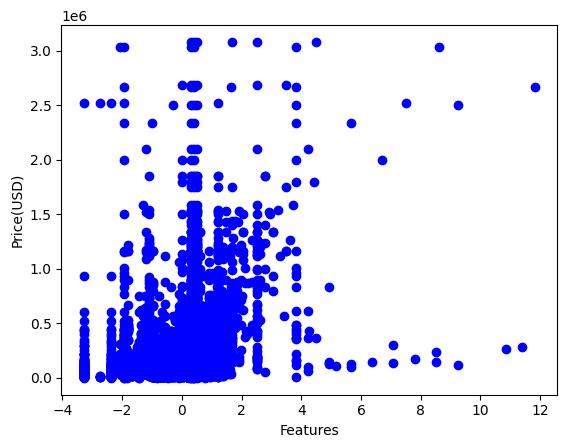

In [35]:
plt.plot(train_x, train_y, 'bo')
plt.xlabel('Features')
plt.ylabel('Price(USD)')
plt.show()
df.to_csv('cleaned_dataset_2.csv', index=False)

In [39]:
model=GradientBoostingRegressor(loss='squared_error',n_estimators=500,max_depth=128,min_samples_split=2,min_samples_leaf=2)

In [40]:

model.fit(train_x,train_y)

predict_trainYn = model.predict(train_x)
predict_testYn=model.predict(test_x)

r_train=r2_score(train_y,predict_trainYn)
r_test=r2_score(test_y,predict_testYn)
print(r_train)
print(r_test) 

0.9905895320577368
0.7314253523600784


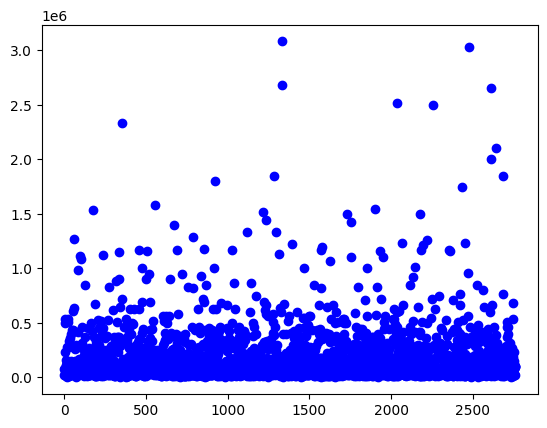

In [42]:
plt.plot(predict_trainYn, 'bo')
plt.show()